# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.optimizers import Adam

## Indest Data

In [2]:
df=pd.read_csv("Frozen_Dessert_Production.csv",index_col='DATE',
                 parse_dates=True)

In [3]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [4]:
df.tail()

,IPN31152N
DATE,
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263
2019-08-01,102.609
2019-09-01,101.587


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [6]:
df.describe()

,IPN31152N
count,573.000
mean,109.896
std,27.951
min,58.660
25%,88.936
50%,107.643
75%,128.278
max,196.174


In [7]:
df.columns=["Production"]

<AxesSubplot:>

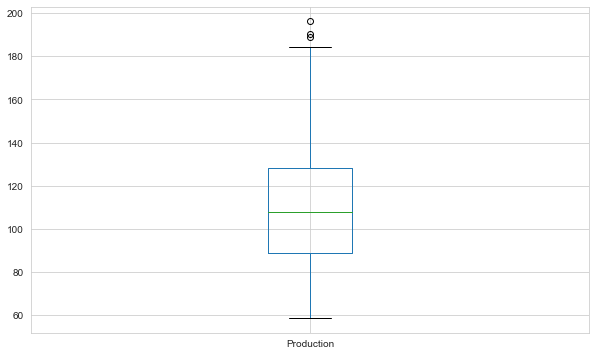

In [8]:
df.Production.plot(kind='box')

In [9]:
df1=df[df["Production"]<188] ## drop 3 outlier

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 570 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  570 non-null    float64
dtypes: float64(1)
memory usage: 8.9 KB


In [11]:
df.isnull().any()

Production    False
dtype: bool

<AxesSubplot:xlabel='DATE'>

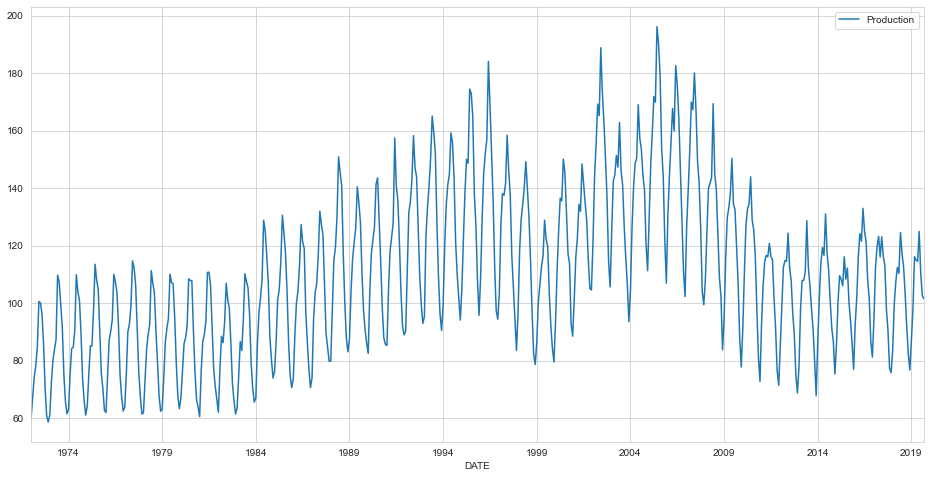

In [12]:
df.plot(figsize=(16,8))

<AxesSubplot:xlabel='DATE'>

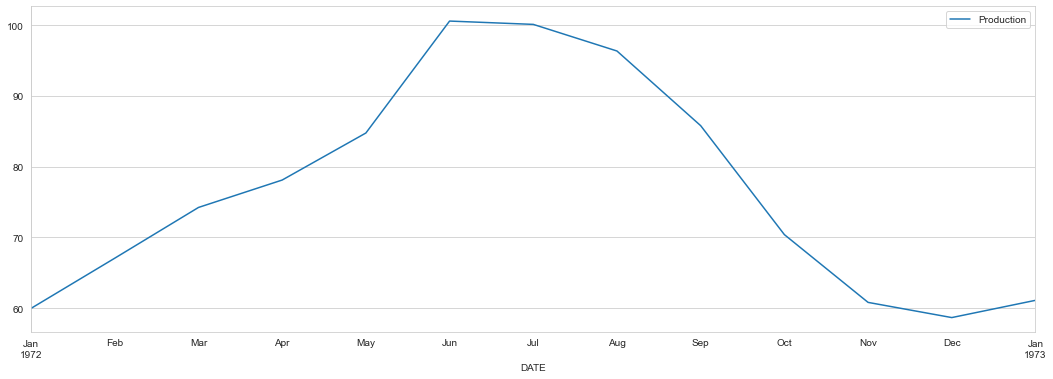

In [13]:
df.loc["1972-01-01":"1973-01-01"].plot(figsize=(18,6))

## Preprocessing of Data

### Train Test Split

In [14]:
test_size=24
test_ind=len(df)-test_size
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

### Scaling

In [15]:
scaler=MinMaxScaler()
train_scaled=scaler.fit_transform(train)
test_scaled=scaler.transform(test)

## Time Series Generator

In [16]:
length=12
generator=TimeseriesGenerator(train_scaled,train_scaled,length=length,batch_size=1)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

## Modelling & Model Performance

### Creating Model

### with "tanh" activation function

In [54]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [52]:
n_features=1
model = Sequential()
model.add(LSTM(100, activation = 'tanh', input_shape = (length, n_features)))
model.add(Dense(1))
opt =Adam(lr = 0.005)#keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='mse', optimizer=opt)
#model.compile(optimizer = 'adam', loss = 'mse')

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,callbacks=[early_stop])#

Epoch 1/20
537/537 [==============================] - 6s 8ms/step - loss: 0.0125 - val_loss: 0.0042
Epoch 2/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0049 - val_loss: 0.0023
Epoch 3/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0037 - val_loss: 0.0022
Epoch 4/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0046 - val_loss: 0.0035
Epoch 5/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0040 - val_loss: 0.0049
Epoch 6/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 7/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0043 - val_loss: 0.0022
Epoch 8/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 10/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0032 - val_loss: 0.0043

<AxesSubplot:>

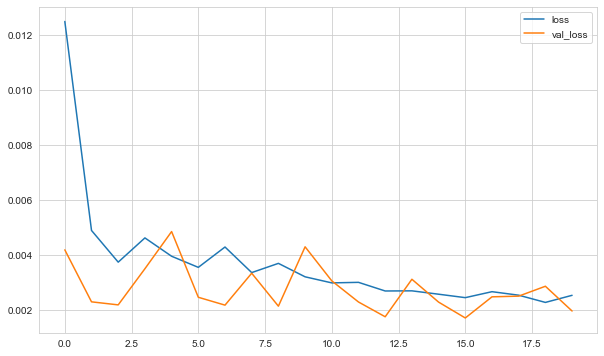

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [22]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [57]:
y_pred = model.predict(validation_generator)

In [58]:
len(y_pred)

12

In [59]:
eval_metrics(test_scaled[-12:], y_pred)

r2_score: 0.8202323206260007 
 mae: 0.031727193324344295 
 mse: 0.001964440203450436 
 rmse: 0.04432200585996121


In [60]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [61]:
len(test_predictions)

24

In [62]:
eval_metrics(test_scaled, test_predictions)

r2_score: 0.855643626284885 
 mae: 0.03445586873184176 
 mse: 0.0016894994709542464 
 rmse: 0.04110352139360138


#### Inverse Transformations and Comparing

In [63]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test.head()

,Production,Predictions,Predictions_2
DATE,,,
2017-10-01,90.473,88.352,89.676
2017-11-01,77.438,83.183,79.667
2017-12-01,75.812,83.996,81.287
2018-01-01,83.434,94.067,93.352
2018-02-01,99.490,104.243,104.821


<AxesSubplot:xlabel='DATE'>

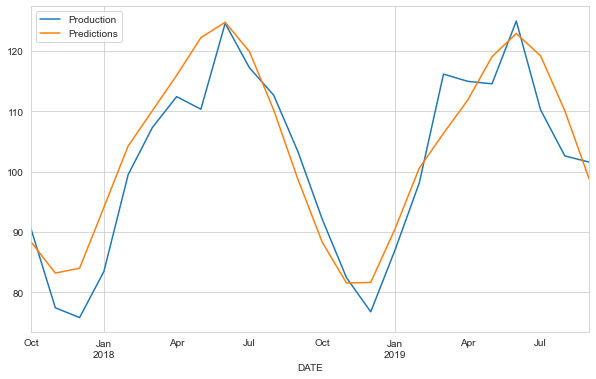

In [64]:
test[['Production','Predictions']].plot()

#### Calculation R2 Score and Error Metrics

In [65]:
eval_metrics(test.Production, test.Predictions)

r2_score: 0.8556436262848852 
 mae: 4.738160887203612 
 mse: 31.948557810884598 
 rmse: 5.652305530567557


### with "relu" activation function

In [32]:

model_2 = Sequential()
model_2.add(LSTM(64, activation = 'relu', input_shape = (length, n_features)))
model_2.add(Dense(1))
#opt =Adam(lr = 0.0008)#keras.optimizers.Adam(learning_rate=0.005)
#model_2.compile(loss='mse', optimizer=opt)
model_2.compile(optimizer = 'adam', loss = 'mse')

In [33]:
model_2.fit_generator(generator, epochs = 50,
                    validation_data = validation_generator,callbacks=[early_stop])

Epoch 1/50
537/537 [==============================] - 4s 6ms/step - loss: 0.0232 - val_loss: 0.0089
Epoch 2/50
537/537 [==============================] - 3s 6ms/step - loss: 0.0131 - val_loss: 0.0051
Epoch 3/50
537/537 [==============================] - 3s 6ms/step - loss: 0.0060 - val_loss: 0.0018
Epoch 4/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0044 - val_loss: 0.0021
Epoch 5/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0042 - val_loss: 0.0020
Epoch 6/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 7/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0036 - val_loss: 0.0019
Epoch 8/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0036 - val_loss: 0.0020


<AxesSubplot:>

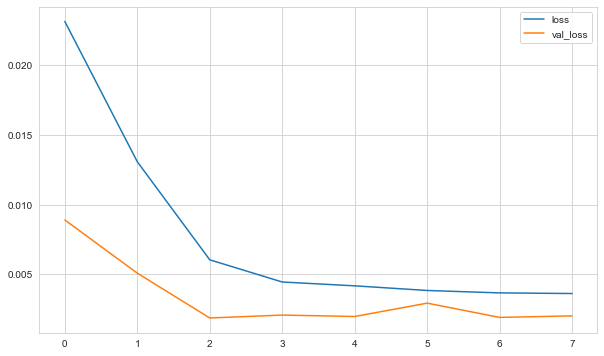

In [34]:
loss_df = pd.DataFrame(model_2.history.history)
loss_df.plot()

In [35]:
y_pred_2 = model_2.predict(validation_generator)
eval_metrics(test_scaled[-12:], y_pred_2)

r2_score: 0.8173183970881097 
 mae: 0.03954531871012939 
 mse: 0.001996282571152723 
 rmse: 0.044679778100979006


#### Evaluate on Test Data

In [36]:
test_predictions_2 = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model_2.predict(current_batch)[0]
    
    # store prediction
    test_predictions_2.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [37]:
eval_metrics(test_scaled, test_predictions_2)

r2_score: 0.8203842673777428 
 mae: 0.0374002873086721 
 mse: 0.0021021633990282802 
 rmse: 0.045849355491961716


#### Inverse Transformations and Comparing

In [66]:
true_predictions_2 = scaler.inverse_transform(test_predictions_2)
test['Predictions_2'] = true_predictions_2
test

,Production,Predictions,Predictions_2
DATE,,,
2017-10-01,90.473,88.352,89.676
2017-11-01,77.438,83.183,79.667
2017-12-01,75.812,83.996,81.287
2018-01-01,83.434,94.067,93.352
2018-02-01,99.490,104.243,104.821
2018-03-01,107.315,110.107,112.172
2018-04-01,112.431,115.957,115.719
2018-05-01,110.354,122.209,118.136
2018-06-01,124.584,124.765,118.466


<AxesSubplot:xlabel='DATE'>

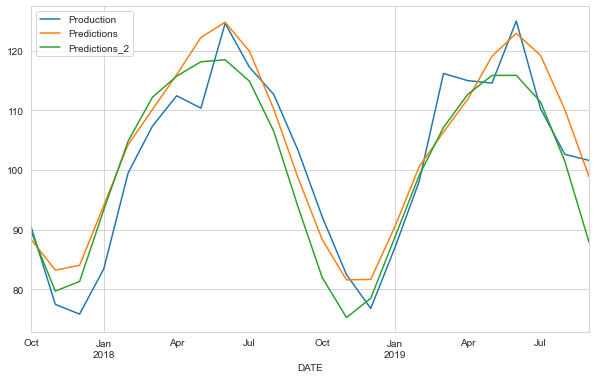

In [67]:
test.plot()

#### Calculation R2 Score and Error Metrics

In [40]:
eval_metrics(test.Production, test.Predictions_2)

r2_score: 0.8203842673777428 
 mae: 5.143059368936005 
 mse: 39.75206268863022 
 rmse: 6.3049236861860765


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [68]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)
length = 12 
generator_final = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)
model.fit_generator(generator_final,epochs=20)

Epoch 1/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0025
Epoch 2/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0023
Epoch 3/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0022
Epoch 4/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0022
Epoch 5/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0023A:
Epoch 6/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0022
Epoch 7/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0021
Epoch 8/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0022
Epoch 9/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0021
Epoch 10/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0021
Epoch 11/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0021
Epoch 12/20
561/561 [==============================] - 4s 8ms/step - loss: 0.0019A:
Epoch 13/20
561/561 [

In [69]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [70]:
forecast = scaler.inverse_transform(forecast)

In [72]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [73]:
forecast_index = pd.date_range(start = '2019-10-01', periods = periods, freq = 'MS')

In [75]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2019-10-01,91.408
2019-11-01,83.881
2019-12-01,82.165
2020-01-01,92.271
2020-02-01,105.294
2020-03-01,113.356
2020-04-01,118.221
2020-05-01,124.773
2020-06-01,125.056
2020-07-01,117.299


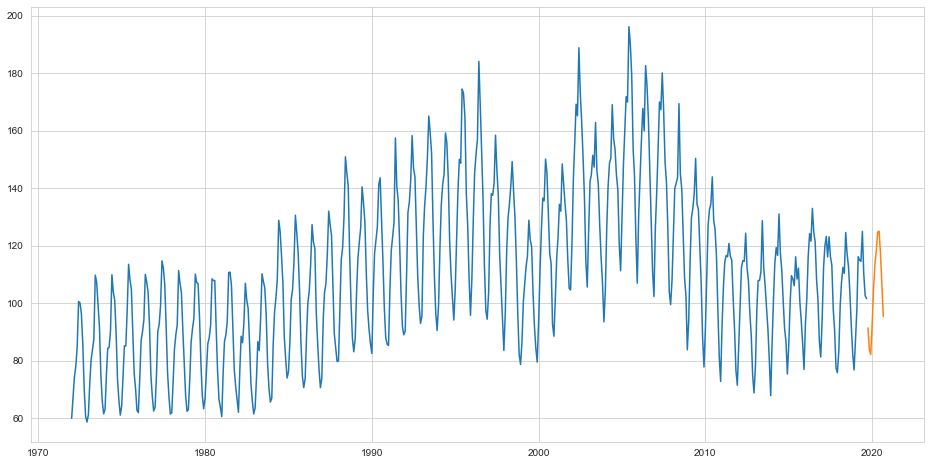

In [76]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

(576.0, 611.0)

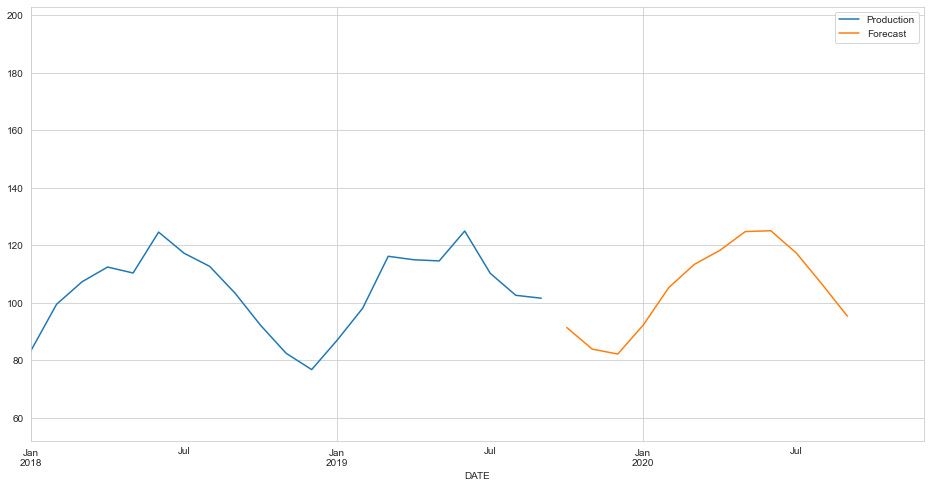

In [77]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

In [78]:
model.save("Rnn_Ass_3.h5")